<a href="https://colab.research.google.com/github/shumshersubashgautam/AI_TRAINING/blob/master/P19skincancerclasify_(7typesofcancer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
cd ..

/


In [0]:
cd .kaggle

/root/.kaggle


In [0]:
!mkdir .kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sagaradh","key":"a8274338b58ea0cceb5a8bec2ed17afa"}'}

In [0]:
cd ..

/


In [0]:
cd root

/root


In [0]:
cd ..

/


In [0]:
cd content

/content


In [0]:
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000 -p data/

100% 2.61G/2.62G [01:04<00:00, 48.6MB/s]
100% 2.62G/2.62G [01:04<00:00, 43.7MB/s]


In [0]:
!unzip data/skin-cancer-mnist-ham10000.zip -d data/

Archive:  data/skin-cancer-mnist-ham10000.zip
  inflating: data/hmnist_28_28_RGB.csv  
  inflating: data/HAM10000_metadata.csv  
  inflating: data/HAM10000_images_part_1.zip  
  inflating: data/hmnist_28_28_L.csv  
  inflating: data/hmnist_8_8_L.csv   
  inflating: data/HAM10000_images_part_2.zip  
  inflating: data/hmnist_8_8_RGB.csv  


In [0]:
!sudo unzip data/HAM10000_images_part_1.zip -d data/
!sudo unzip data/HAM10000_images_part_2.zip -d data/
! chmod 600 data/HAM10000_metadata.csv

Archive:  data/HAM10000_images_part_1.zip
  inflating: data/ISIC_0024306.jpg   
  inflating: data/ISIC_0024307.jpg   
  inflating: data/ISIC_0024308.jpg   
  inflating: data/ISIC_0024309.jpg   
  inflating: data/ISIC_0024310.jpg   
  inflating: data/ISIC_0024311.jpg   
  inflating: data/ISIC_0024312.jpg   
  inflating: data/ISIC_0024313.jpg   
  inflating: data/ISIC_0024314.jpg   
  inflating: data/ISIC_0024315.jpg   
  inflating: data/ISIC_0024316.jpg   
  inflating: data/ISIC_0024317.jpg   
  inflating: data/ISIC_0024318.jpg   
  inflating: data/ISIC_0024319.jpg   
  inflating: data/ISIC_0024320.jpg   
  inflating: data/ISIC_0024321.jpg   
  inflating: data/ISIC_0024322.jpg   
  inflating: data/ISIC_0024323.jpg   
  inflating: data/ISIC_0024324.jpg   
  inflating: data/ISIC_0024325.jpg   
  inflating: data/ISIC_0024326.jpg   
  inflating: data/ISIC_0024327.jpg   
  inflating: data/ISIC_0024328.jpg   
  inflating: data/ISIC_0024329.jpg   
  inflating: data/ISIC_0024330.jpg   
  inflat

In [0]:
# System
import sys
import os
from os import path
import argparse

# Time
import time
import datetime

# Numerical Data
import random
from random import shuffle
import numpy as np 
import pandas as pd
from collections import Counter

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import itertools
import gc
import json

# NLP
import re
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import class_weight as cw
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.multiclass import OneVsRestClassifier

# Machine Learning Evaluation
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model
import keras
from keras import models
from keras.models import Model
from keras.models import Sequential

# Deep Learning - Keras - Layers
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.layers.pooling import _GlobalPooling1D

# Deep Learning - Keras - Pretrained Model 
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetMobile, NASNetLarge

from keras.applications.nasnet import preprocess_input

# Deep Learning - Keras - Evauation
from keras import optimizers
from keras.optimizers import Adam, SGD , RMSprop
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy

# Deep Learning - Keras - Visualisation
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
# from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

# Deep Learning - TensorFlow
import tensorflow as tf

# Graph/ Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix

# Image
import cv2
from PIL import Image
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS

# np.random.seed(42)

%matplotlib inline

# Input data
print(os.listdir("data/"))

Using TensorFlow backend.


['ISIC_0028384.jpg', 'ISIC_0027502.jpg', 'ISIC_0026353.jpg', 'ISIC_0024553.jpg', 'ISIC_0030091.jpg', 'ISIC_0031363.jpg', 'ISIC_0026881.jpg', 'ISIC_0024710.jpg', 'ISIC_0026099.jpg', 'ISIC_0029038.jpg', 'ISIC_0031124.jpg', 'ISIC_0024576.jpg', 'ISIC_0030823.jpg', 'ISIC_0028418.jpg', 'ISIC_0032580.jpg', 'ISIC_0024406.jpg', 'ISIC_0032579.jpg', 'ISIC_0028254.jpg', 'ISIC_0024370.jpg', 'ISIC_0027367.jpg', 'ISIC_0030682.jpg', 'ISIC_0029429.jpg', 'ISIC_0029240.jpg', 'ISIC_0030501.jpg', 'ISIC_0031730.jpg', 'ISIC_0027244.jpg', 'ISIC_0033067.jpg', 'ISIC_0026639.jpg', 'ISIC_0024777.jpg', 'ISIC_0030195.jpg', 'ISIC_0028837.jpg', 'ISIC_0029058.jpg', 'ISIC_0032676.jpg', 'ISIC_0027718.jpg', 'ISIC_0029668.jpg', 'ISIC_0032268.jpg', 'ISIC_0029920.jpg', 'ISIC_0024754.jpg', 'ISIC_0033952.jpg', 'ISIC_0025323.jpg', 'ISIC_0033475.jpg', 'ISIC_0031291.jpg', 'ISIC_0025260.jpg', 'ISIC_0032540.jpg', 'ISIC_0025875.jpg', 'ISIC_0024701.jpg', 'ISIC_0028738.jpg', 'ISIC_0025420.jpg', 'ISIC_0029623.jpg', 'ISIC_0030602.jpg',

In [0]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [0]:
 !mkdir figures/sample

In [0]:
input_directory = r"data/"
output_directory = r"output/"

training_dir = input_directory + r"train"
testing_dir = input_directory + r"test"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)
    
figure_directory = "output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)
    
    
file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

In [0]:
df = pd.read_csv("data/HAM10000_metadata.csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [0]:
cd ..

/content


In [0]:
# Categories of the diferent diseases
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

df['lesion'] = df.dx.map(lesion_type_dict)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,lesion
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis


In [0]:
print(df.lesion.value_counts())

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64


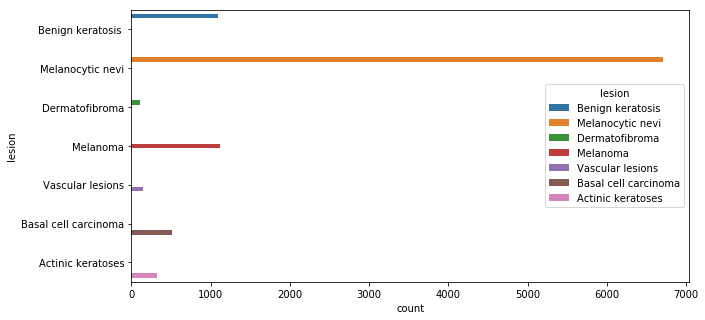

In [0]:

fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='lesion',data=df, hue="lesion",ax=ax1)

In [0]:
num_sample = 200

df_df = df.loc[df['dx'] == "df"][0:115]
df_vasc = df.loc[df['dx'] == "vasc"][0:142]
df_akiec = (df.loc[df['dx'] == "akiec"]).sample(num_sample)
df_bcc = df.loc[df['dx'] == "bcc"][0:num_sample].sample(num_sample)
df_bkl = df.loc[df['dx'] == "bkl"][0:num_sample].sample(num_sample)
df_mel = df.loc[df['dx'] == "mel"][0:num_sample].sample(num_sample)
df_nv = df.loc[df['dx'] == "nv"][0:num_sample].sample(num_sample)

df = pd.concat([df_akiec, df_bcc, df_bkl, df_df, df_mel, df_nv, df_vasc])
df = shuffle(df)

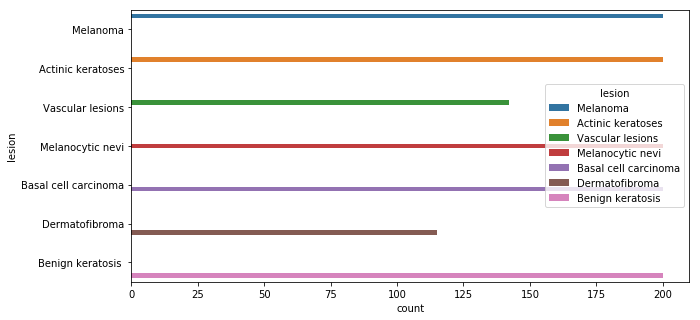

In [0]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='lesion',data=df, hue="lesion",ax=ax1)

In [0]:
tfms = get_transforms(flip_vert=True)
data = ImageDataBunch.from_df("data/", df, fn_col=1, suffix='.jpg', label_col=7, ds_tfms=tfms, size=224, bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1006 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Melanoma,Actinic keratoses,Melanocytic nevi,Basal cell carcinoma,Melanoma
Path: data;

Valid: LabelList (251 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Melanocytic nevi,Melanoma,Actinic keratoses,Benign keratosis ,Melanocytic nevi
Path: data;

Test: None

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

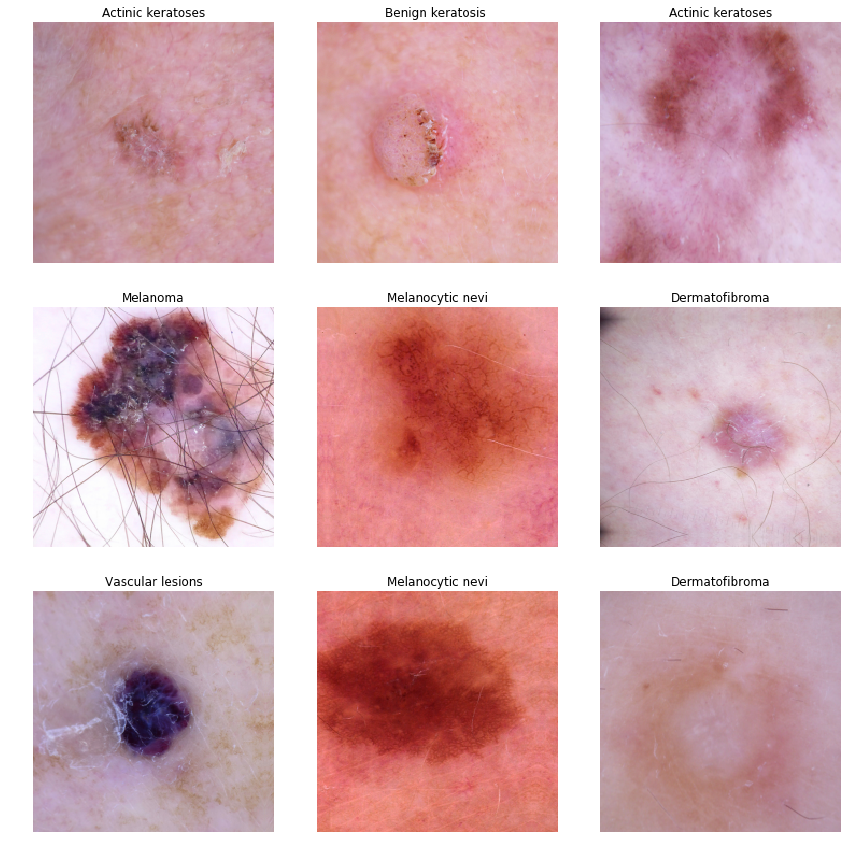

In [0]:
data.show_batch(rows=3)

In [0]:
learner = cnn_learner(data, models.densenet169, metrics=[accuracy, FBeta(average='macro')], model_dir="../models/")
learner.loss_func = nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 57365526/57365526 [00:00<00:00, 103395985.47it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


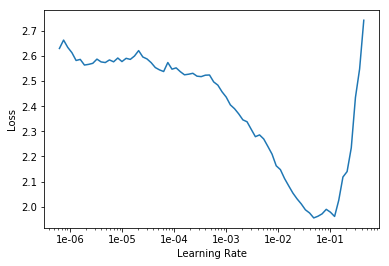

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
learner.fit_one_cycle(30, 1e-3, callbacks=[SaveModelCallback(learner, every='improvement', monitor='accuracy', name='model_best')])

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,2.233424,1.697973,0.342629,0.326778,00:45
1,1.728986,1.102177,0.633466,0.574763,00:41
2,1.368332,0.843195,0.709163,0.666400,00:41
3,1.087912,0.658444,0.772908,0.756246,00:46
4,0.900684,0.620156,0.752988,0.752462,00:47
5,0.749205,0.542691,0.800797,0.798899,00:50
6,0.670122,0.460813,0.844622,0.842415,00:50
7,0.598356,0.491286,0.836653,0.834759,00:50
8,0.544289,0.419821,0.852590,0.850738,00:52
9,0.464925,0.365817,0.860558,0.865083,00:50


Better model found at epoch 0 with accuracy value: 0.34262949228286743.
Better model found at epoch 1 with accuracy value: 0.6334661245346069.
Better model found at epoch 2 with accuracy value: 0.7091633677482605.
Better model found at epoch 3 with accuracy value: 0.7729083895683289.
Better model found at epoch 5 with accuracy value: 0.8007968068122864.
Better model found at epoch 6 with accuracy value: 0.8446215391159058.
Better model found at epoch 8 with accuracy value: 0.8525896668434143.
Better model found at epoch 9 with accuracy value: 0.8605577945709229.
Better model found at epoch 10 with accuracy value: 0.8804780840873718.
Better model found at epoch 13 with accuracy value: 0.8884462118148804.
Better model found at epoch 14 with accuracy value: 0.9043824672698975.
Better model found at epoch 22 with accuracy value: 0.9083665609359741.
Better model found at epoch 24 with accuracy value: 0.9203187227249146.
Better model found at epoch 28 with accuracy value: 0.9282868504524231.

In [0]:
learner = learner.load("model_best")

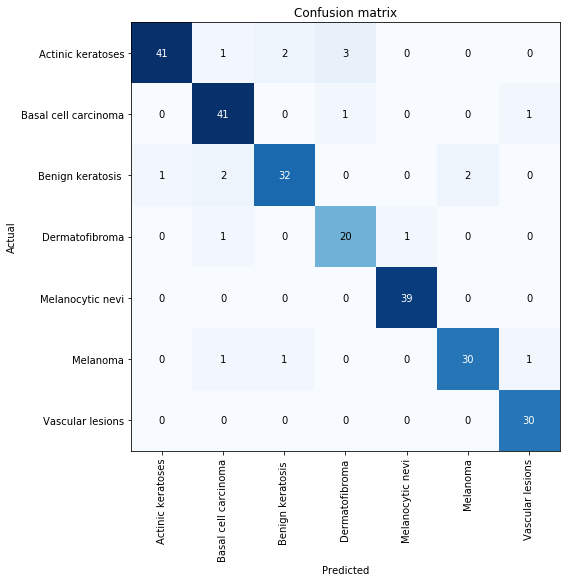

In [0]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(10,8))

In [0]:
interp.most_confused()

[('Actinic keratoses', 'Dermatofibroma', 3),
 ('Actinic keratoses', 'Benign keratosis ', 2),
 ('Benign keratosis ', 'Basal cell carcinoma', 2),
 ('Benign keratosis ', 'Melanoma', 2),
 ('Actinic keratoses', 'Basal cell carcinoma', 1),
 ('Basal cell carcinoma', 'Dermatofibroma', 1),
 ('Basal cell carcinoma', 'Vascular lesions', 1),
 ('Benign keratosis ', 'Actinic keratoses', 1),
 ('Dermatofibroma', 'Basal cell carcinoma', 1),
 ('Dermatofibroma', 'Melanocytic nevi', 1),
 ('Melanoma', 'Basal cell carcinoma', 1),
 ('Melanoma', 'Benign keratosis ', 1),
 ('Melanoma', 'Vascular lesions', 1)]

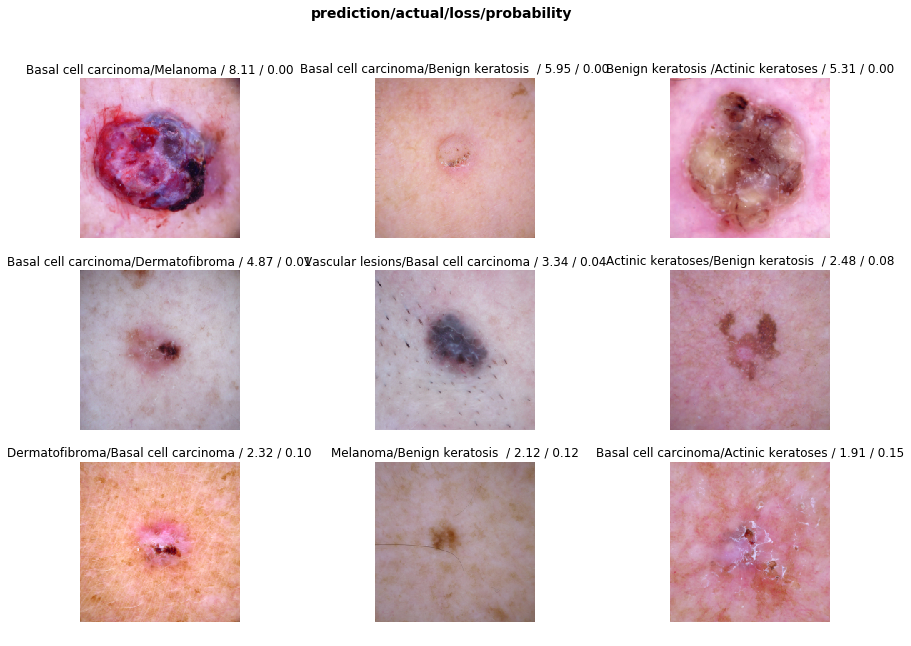

In [0]:
interp.plot_top_losses(9, figsize=(15,10), heatmap=False)